# **1. Import Libraries and Load Data Set**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DATASETS/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("sales", axis=1)
y = df["sales"]

# **2. Data Preprocessing**

## 2.1. Polynomial Conversion

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [6]:
poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

## 2.2. Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## 2.3. Scaling

--------------

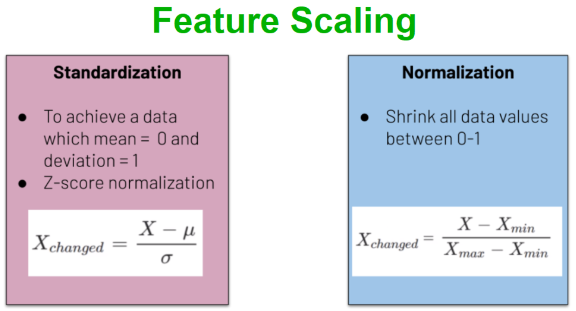

------------------------

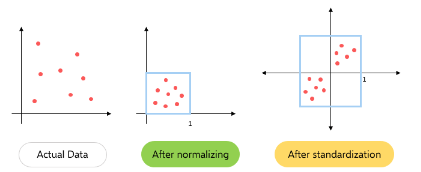

------------

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [14]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

# **3. Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [20]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


# **4. Multicollinearity Control**

>Multicollinearity occurs when independent variables (features) in a regression model are highly linearly related. This can create significant issues in regression analysis and reduce the reliability of the model. When multicollinearity is present, it becomes difficult to distinguish the effects of individual independent variables, and the predictive performance of the model may suffer.

**Solutions**:
1. **Removing Variables**: Eliminate some of the highly correlated variables from the model.
2. **Principal Component Analysis (PCA)**: Reduce the data to fewer, independent components.
3. **Ridge or Lasso Regression**: Use penalization methods in regression models to reduce multicollinearity.

In [21]:
def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [22]:
pd.DataFrame(poly_features).corr().style.map(color_custom) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

# **5. Cross Validation**

In [24]:
from sklearn.metrics import get_scorer_names

In [25]:
scorers_list = get_scorer_names()
print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2',
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error', 
                        ], cv=10, return_train_score=True)

In [28]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.007965,0.011000,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.006458,0.007000,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.006999,0.006000,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.005898,0.006101,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.006000,0.006001,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.005000,0.006033,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.004991,0.006956,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.004006,0.004033,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.005904,0.003983,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.005446,0.004006,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [30]:
# Summerize the above df:

scores = pd.DataFrame(scores, index=range(1,11)) 
scores.iloc[:, 2:].mean()

test_r2                              0.842033
train_r2                             0.997797
test_neg_mean_absolute_error        -0.611475
train_neg_mean_absolute_error       -0.180847
test_neg_mean_squared_error         -3.863458
train_neg_mean_squared_error        -0.057904
test_neg_root_mean_squared_error    -1.227496
train_neg_root_mean_squared_error   -0.240493
dtype: float64

> ***Results without Cross Validation***:

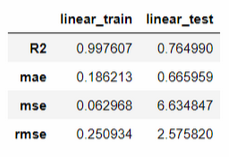

In [31]:
lm_df = pd.DataFrame(lm.coef_, columns= ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# **6. Regularization**

## 6.1. Ridge Regression 

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_model = Ridge(alpha=1)  # default alpha=1

In [36]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [37]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [38]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [39]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


### 6.1.1. For Ridge Regression CV with alpha=1

In [40]:
model_ridge = Ridge(alpha=1)
scores = cross_validate(model_ridge,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2',
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error', 
                        ], cv=10, return_train_score=True)

In [42]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                              0.978573
train_r2                             0.988599
test_neg_mean_absolute_error        -0.441032
train_neg_mean_absolute_error       -0.339946
test_neg_mean_squared_error         -0.561648
train_neg_mean_squared_error        -0.299841
test_neg_root_mean_squared_error    -0.666021
train_neg_root_mean_squared_error   -0.546325
dtype: float64

> ***Results without Cross Validation***:

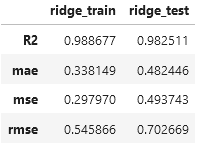

In [44]:
rm_df = pd.DataFrame(ridge_model.coef_, columns=["ridge_coef_1"])
rm_df

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [45]:
pd.concat([lm_df, rm_df], axis=1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


### 6.1.2. Choosing Best alpha Value with GridSearchCV for Ridge

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [48]:
ridge_model = Ridge()

In [49]:
param_grid = {"alpha": alpha_space}

In [53]:
grid_ridge = GridSearchCV(estimator = ridge_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =10, verbose =1, return_train_score=True)

In [54]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [55]:
grid_ridge.best_params_

{'alpha': 0.02}

In [56]:
dir(grid_ridge)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [57]:
df_grid_ridge = pd.DataFrame(grid_ridge.cv_results_)
df_grid_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004456,0.001623,0.001702,0.000641,0.01,{'alpha': 0.01},-0.483099,-0.573140,-0.662998,-0.570154,-0.378272,-1.262311,-0.331072,-0.324546,-0.735112,-0.545124,-0.586583,0.259756,3,-0.366068,-0.344533,-0.358379,-0.367921,-0.365789,-0.273821,-0.366794,-0.367887,-0.333155,-0.371309,-0.351565,0.028368
1,0.001807,0.000541,0.000998,0.000025,0.02,{'alpha': 0.02},-0.459982,-0.585564,-0.679165,-0.491259,-0.379120,-1.279917,-0.349254,-0.344955,-0.728592,-0.385928,-0.568374,0.270049,1,-0.387516,-0.367130,-0.380186,-0.390567,-0.388323,-0.288794,-0.389428,-0.391929,-0.353711,-0.394658,-0.373224,0.030659
2,0.001640,0.000656,0.000705,0.000643,0.03,{'alpha': 0.03},-0.448626,-0.591197,-0.683641,-0.652494,-0.376404,-1.289903,-0.362661,-0.361567,-0.726250,-0.316422,-0.580916,0.276514,2,-0.401254,-0.381141,-0.393969,-0.404477,-0.403007,-0.299237,-0.403245,-0.406458,-0.367145,-0.409564,-0.386950,0.031774
3,0.001704,0.000427,0.000412,0.000505,0.04,{'alpha': 0.04},-0.440734,-0.593843,-0.684024,-0.804063,-0.374083,-1.297111,-0.372390,-0.373698,-0.724333,-0.279355,-0.594363,0.288458,4,-0.411467,-0.391366,-0.404004,-0.414236,-0.413850,-0.307017,-0.413109,-0.416729,-0.377152,-0.420434,-0.396936,0.032496
4,0.001322,0.000215,0.001031,0.000039,0.05,{'alpha': 0.05},-0.434872,-0.595071,-0.682619,-0.921712,-0.372465,-1.303041,-0.379618,-0.382858,-0.722420,-0.257836,-0.605251,0.301854,5,-0.419604,-0.399439,-0.411857,-0.421592,-0.422373,-0.313121,-0.420729,-0.424613,-0.385126,-0.428924,-0.404738,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001104,0.000310,0.000401,0.000492,0.96,{'alpha': 0.9600000000000001},-0.509989,-0.645028,-0.611215,-0.943567,-0.400877,-1.582123,-0.377338,-0.565322,-0.611315,-0.403802,-0.665058,0.343451,96,-0.560229,-0.546313,-0.552231,-0.545298,-0.562591,-0.434831,-0.558403,-0.560577,-0.537614,-0.567691,-0.542578,0.036967
96,0.001009,0.000039,0.000295,0.000450,0.97,{'alpha': 0.97},-0.511032,-0.645844,-0.611219,-0.939496,-0.401215,-1.584227,-0.377280,-0.566811,-0.610675,-0.405147,-0.665295,0.343478,97,-0.561136,-0.547279,-0.553176,-0.546240,-0.563518,-0.435715,-0.559379,-0.561500,-0.538659,-0.568601,-0.543520,0.036979
97,0.000890,0.000298,0.000700,0.000460,0.98,{'alpha': 0.98},-0.512070,-0.646660,-0.611226,-0.935469,-0.401552,-1.586317,-0.377229,-0.568294,-0.610043,-0.406484,-0.665534,0.343513,98,-0.562040,-0.548241,-0.554116,-0.547179,-0.564442,-0.436594,-0.560352,-0.562418,-0.539699,-0.569507,-0.544459,0.036991
98,0.001211,0.000394,0.000096,0.000289,0.99,{'alpha': 0.99},-0.513102,-0.647476,-0.611236,-0.931484,-0.401889,-1.588392,-0.377183,-0.569771,-0.609417,-0.407813,-0.665776,0.343555,99,-0.562941,-0.549199,-0.555053,-0.548115,-0.565363,-0.437469,-0.561320,-0.563333,-0.540736,-0.570410,-0.545394,0.037004


In [58]:
grid_ridge.best_index_

1

In [59]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.568374
mean_train_score   -0.373224
Name: 1, dtype: object

In [61]:
grid_ridge.best_score_  # best test_score

-0.5683736426878261

In [64]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [65]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [66]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [68]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train)

In [69]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

In [70]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


## 6.2. Lasso

In [71]:
from sklearn.linear_model import Lasso

In [72]:
lasso_model = Lasso(alpha=1) # default alpha=1
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [73]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [74]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [75]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


For overfitting control, we should look at not only r2 but also scores such as rmse.

For example, the rmse scores of ridge above seem to be better than those of lasso. However, the test rmse score in ridge is much higher than the train rmse score, while the train rmse score and test rmse score in lasso are much closer to each other. While there is overfitting in ridge, there is no overfitting in lasso. We cannot deliver ridge to the customer, but we can deliver lasso.

### 6.2.1. For Lasso CV with Default alpha=1

In [76]:
model = Lasso(alpha=1)
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

In [77]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.915992
train_r2                             0.919585
test_neg_mean_absolute_error        -1.039070
train_neg_mean_absolute_error       -1.019127
test_neg_mean_squared_error         -2.231529
train_neg_mean_squared_error        -2.113704
test_neg_root_mean_squared_error    -1.402208
train_neg_root_mean_squared_error   -1.453619
dtype: float64

> ***Results without Cross Validation***:

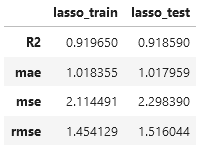

In [78]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [79]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### 6.2.2. Choosing Best alpha Value with GridSearchCV for Lasso

In [81]:
lasso_model = Lasso()

param_grid = {"alpha":alpha_space}

grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=1,
                          return_train_score=True)

grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [82]:
grid_lasso.best_params_

{'alpha': 0.01}

In [83]:
df_grid_lasso = pd.DataFrame(grid_lasso.cv_results_)

In [84]:
df_grid_lasso[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.536544,0.556615
1,0.02,0.615912,0.632106
2,0.03,0.677264,0.690849
3,0.04,0.695577,0.701827
4,0.05,0.717909,0.718893
...,...,...,...
95,0.96,1.420474,1.367504
96,0.97,1.428707,1.376116
97,0.98,1.436970,1.384772
98,0.99,1.445277,1.393470


In [85]:
grid_lasso.best_index_

0

In [86]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.556615
mean_train_score   -0.536544
Name: 0, dtype: object

In [87]:
grid_lasso.best_score_

-0.5566146764121938

In [88]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [89]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [90]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988820,0.986283
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339185,0.441091
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294202,0.387259
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542404,0.622302


In [92]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'

In [93]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [94]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.262750
1,-3.147845,0.689086,0.709275,0.000000,0.178224
2,0.622117,0.170305,0.478838,0.000000,0.138915
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777
4,17.227695,2.723077,3.997813,3.490946,4.161820
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## 6.3. Elastic Net 

In [95]:
from sklearn.linear_model import ElasticNet

In [96]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)

In [97]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [98]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [99]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [100]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988820,0.986283,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339185,0.441091,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294202,0.387259,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542404,0.622302,1.653350,1.663216


### 6.3.1. For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [101]:
model = ElasticNet(alpha=1, l1_ratio=0.5)

In [102]:
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

# ridge ve lasso modellerinde yaptığımız işlemleri tekrar ediyoruz.

In [104]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.885455
train_r2                             0.896240
test_neg_mean_absolute_error        -1.291315
train_neg_mean_absolute_error       -1.248309
test_neg_mean_squared_error         -2.937091
train_neg_mean_squared_error        -2.727562
test_neg_root_mean_squared_error    -1.626465
train_neg_root_mean_squared_error   -1.651103
dtype: float64

In [105]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [106]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [107]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.262750,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.178224,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.138915,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.161820,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


### 6.3.2. Choosing best alpha and l1_ratio values with GridSearchCV for Elastic-Net

In [108]:
elastic_model = ElasticNet()

In [109]:
param_grid = {"alpha":[0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
            "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]}

In [111]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =1, return_train_score=True)

In [112]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [113]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [114]:
df_grid_elastic = pd.DataFrame(grid_model.cv_results_)
df_grid_elastic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.017050,0.003310,0.000897,0.000821,0.01,0.10,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.541561,-0.657697,-0.576682,-0.705267,-0.400971,-1.638762,-0.376817,-0.603158,-0.595195,-0.426597,-0.652271,0.344905,7,-0.586721,-0.574067,-0.579930,-0.573422,-0.589143,-0.460880,-0.586847,-0.586441,-0.566285,-0.593874,-0.569761,0.037172
1,0.009802,0.001585,0.000198,0.000396,0.01,0.25,"{'alpha': 0.01, 'l1_ratio': 0.25}",-0.535391,-0.635186,-0.527698,-0.610099,-0.394219,-1.637164,-0.375298,-0.599417,-0.596676,-0.407768,-0.631892,0.347287,6,-0.584484,-0.575931,-0.581366,-0.574848,-0.588291,-0.462680,-0.586420,-0.585922,-0.566663,-0.593207,-0.569981,0.036500
2,0.006404,0.001106,0.000518,0.000519,0.01,0.50,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.518583,-0.592423,-0.480625,-0.580801,-0.385799,-1.624122,-0.374793,-0.600299,-0.611076,-0.384226,-0.615274,0.348006,5,-0.583387,-0.576676,-0.583046,-0.576320,-0.588196,-0.459906,-0.585262,-0.586590,-0.565283,-0.591436,-0.569610,0.037248
3,0.007137,0.000832,0.000601,0.000491,0.01,0.75,"{'alpha': 0.01, 'l1_ratio': 0.75}",-0.501401,-0.541391,-0.432996,-0.590745,-0.387424,-1.588269,-0.377179,-0.585094,-0.625093,-0.353791,-0.598338,0.342650,4,-0.577651,-0.572230,-0.579051,-0.571272,-0.581953,-0.448267,-0.579058,-0.581530,-0.559961,-0.586043,-0.563702,0.039096
4,0.006834,0.000712,0.000402,0.000493,0.01,0.90,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.473168,-0.493736,-0.402896,-0.573599,-0.381391,-1.545253,-0.367911,-0.547618,-0.613438,-0.321533,-0.572054,0.336859,3,-0.564485,-0.565013,-0.568257,-0.558936,-0.568746,-0.433072,-0.565416,-0.568527,-0.544955,-0.572523,-0.550993,0.039970
5,0.005795,0.000400,0.000605,0.000494,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.466624,-0.480632,-0.396561,-0.568282,-0.374267,-1.526817,-0.364895,-0.531039,-0.613693,-0.314264,-0.563707,0.333627,2,-0.557374,-0.558256,-0.559707,-0.551952,-0.562159,-0.425991,-0.560354,-0.561530,-0.538487,-0.565252,-0.544106,0.040006
6,0.005603,0.000483,0.000488,0.000488,0.01,1.00,"{'alpha': 0.01, 'l1_ratio': 1}",-0.461106,-0.470415,-0.394731,-0.565259,-0.369435,-1.505231,-0.365515,-0.514069,-0.613168,-0.307217,-0.556615,0.328857,1,-0.549992,-0.550678,-0.551329,-0.544929,-0.555439,-0.418332,-0.551461,-0.553902,-0.531596,-0.557780,-0.536544,0.040000
7,0.010099,0.001519,0.000595,0.000486,0.05,0.10,"{'alpha': 0.05, 'l1_ratio': 0.1}",-0.689742,-0.879516,-0.627809,-0.720183,-0.437450,-1.965942,-0.466353,-0.926325,-0.553927,-0.703509,-0.797076,0.417423,14,-0.786375,-0.781175,-0.789746,-0.786451,-0.797683,-0.629977,-0.798037,-0.786776,-0.791498,-0.793653,-0.774137,0.048316
8,0.004412,0.000644,0.000101,0.000303,0.05,0.25,"{'alpha': 0.05, 'l1_ratio': 0.25}",-0.656873,-0.851909,-0.615779,-0.702165,-0.415649,-1.922736,-0.471366,-0.914270,-0.575206,-0.685606,-0.781156,0.406949,13,-0.779692,-0.773671,-0.782887,-0.777748,-0.790061,-0.619062,-0.789453,-0.779698,-0.783554,-0.787700,-0.766353,0.049350
9,0.001904,0.000300,0.000199,0.000398,0.05,0.50,"{'alpha': 0.05, 'l1_ratio': 0.5}",-0.634925,-0.790578,-0.600733,-0.695340,-0.385282,-1.853709,-0.482793,-0.888506,-0.632001,-0.654996,-0.761886,0.387746,12,-0.769575,-0.766081,-0.776217,-0.766767,-0.781560,-0.603039,-0.780515,-0.769546,-0.771966,-0.781313,-0.756658,0.051514


In [115]:
df_grid_elastic[["param_alpha", "param_l1_ratio", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,param_l1_ratio,mean_train_score,mean_test_score
0,0.01,0.10,0.569761,0.652271
1,0.01,0.25,0.569981,0.631892
2,0.01,0.50,0.569610,0.615274
3,0.01,0.75,0.563702,0.598338
4,0.01,0.90,0.550993,0.572054
5,0.01,0.95,0.544106,0.563707
6,0.01,1.00,0.536544,0.556615
7,0.05,0.10,0.774137,0.797076
8,0.05,0.25,0.766353,0.781156
9,0.05,0.50,0.756658,0.761886


In [116]:
grid_model.best_index_

6

In [117]:
pd.DataFrame(grid_model.cv_results_).loc[6, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.556615
mean_train_score   -0.536544
Name: 6, dtype: object

In [118]:
grid_model.best_score_

-0.5566146764121938

In [119]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

# **Final Model**

In [120]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [121]:
final_model = Lasso(alpha=0.01)

In [122]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [123]:
new_sample = [[120, 30, 15]]

In [124]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [125]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [126]:
final_model.predict(scaled_sample)

array([14.49345346])

# **8. Feature Importance**

## 8.1. Feature Importance with Ridge

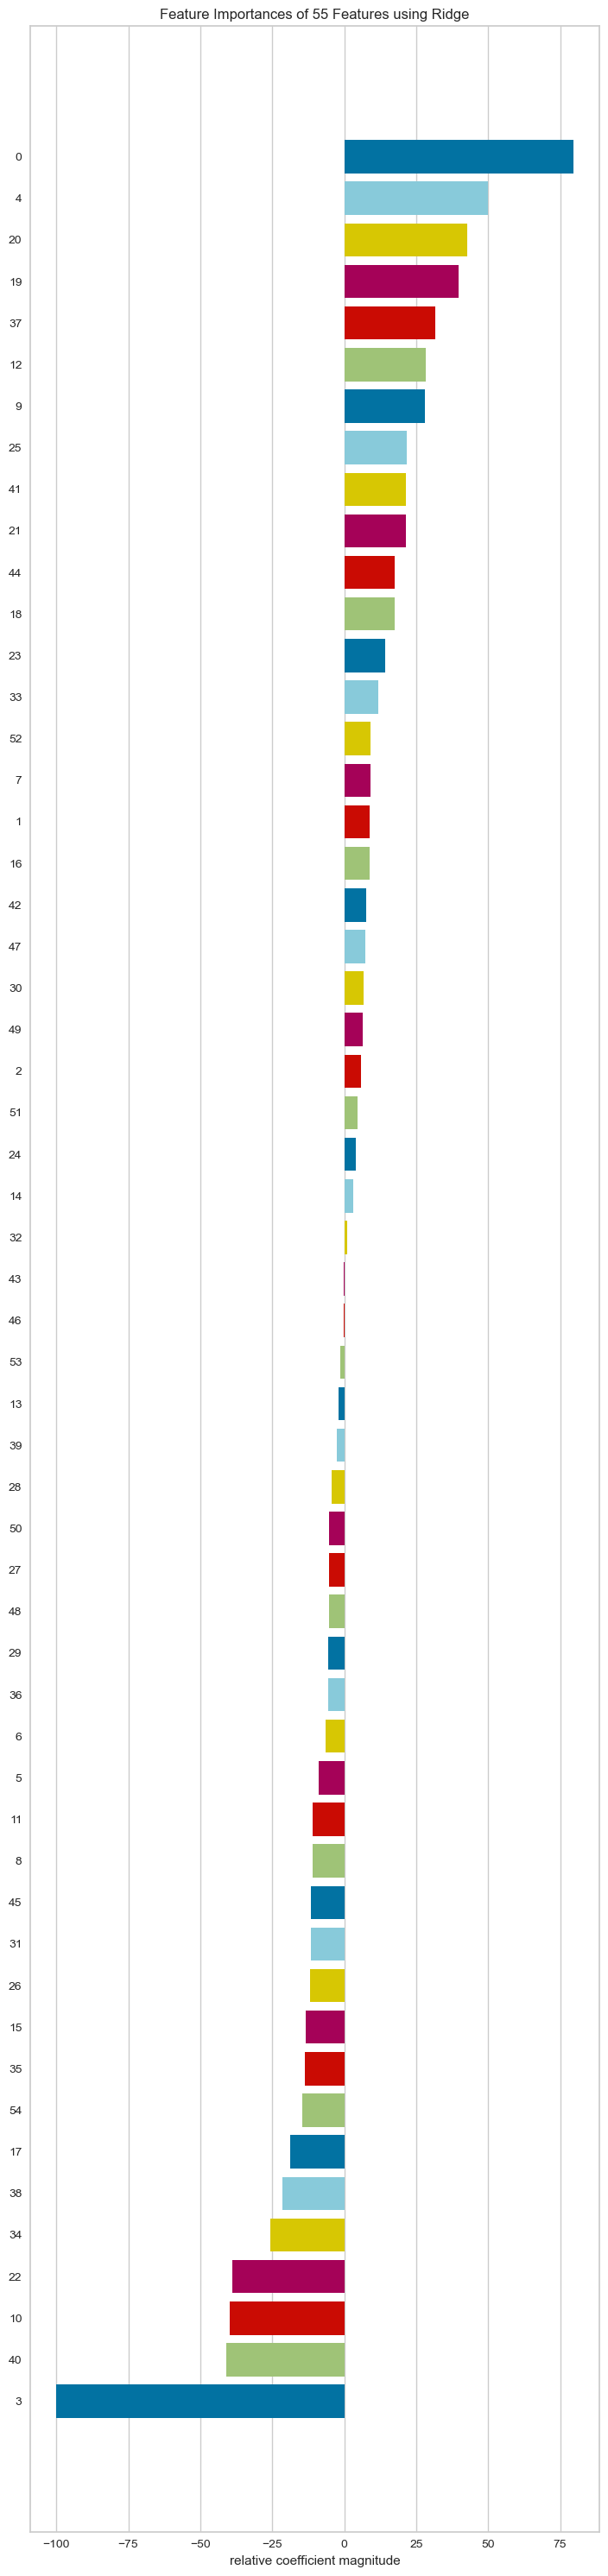

In [127]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## 8.2. Feature Importance with Lasso

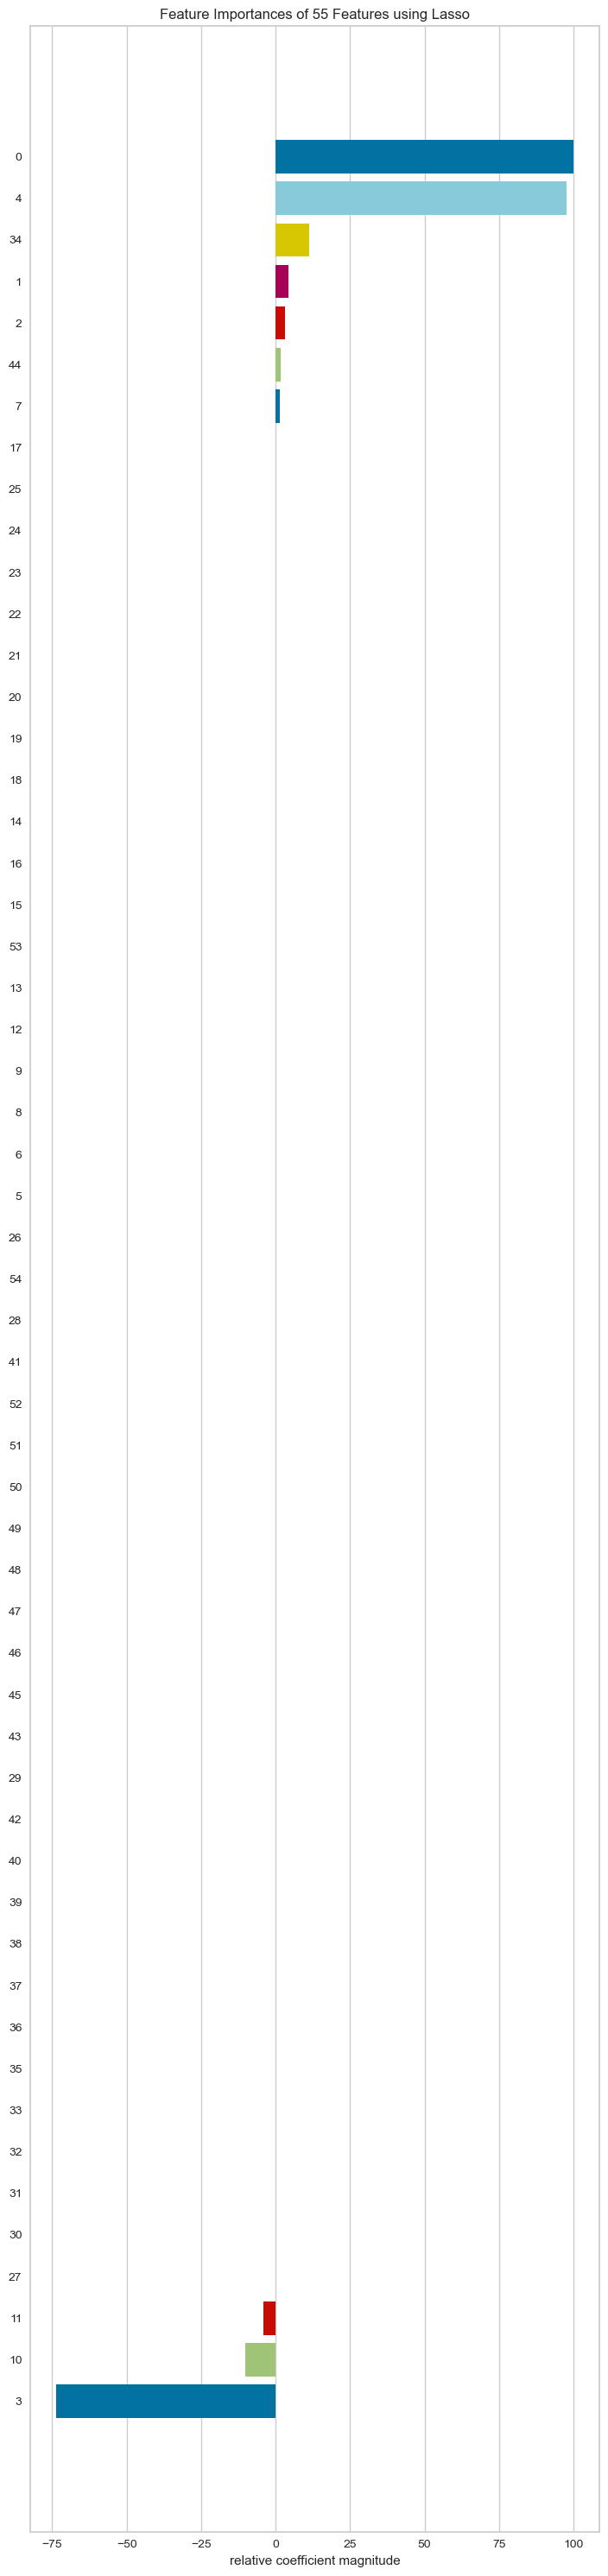

In [128]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();